In [1]:
using Clustering
using Distances

In [2]:
using Plots
using Distributions
using Random

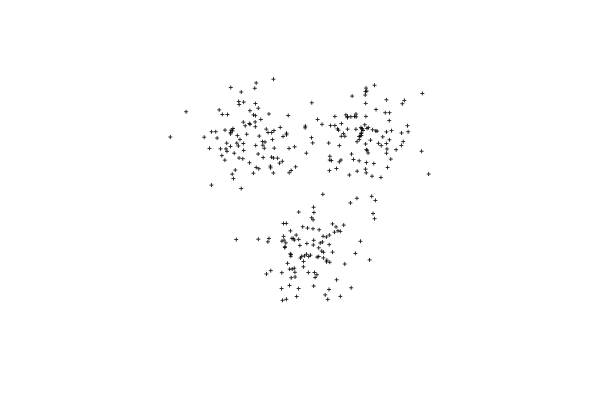

In [3]:
rng = MersenneTwister(1234)
C1 = rand(rng, MvNormal([2,4], .2*[1 0; 0 1]), 100)
C2 = rand(rng, MvNormal([4,4], .2*[1 0; 0 1]), 100)
C3 = rand(rng, MvNormal([3,2], .2*[1 0; 0 1]), 100)
X = cat(C1, C2, C3, dims=2)[:,shuffle(1:end)]
plot1 = plot(ratio=1,grid=:none,xlims=[0,6],ylims=[0,6],frame=:none,legend=:none)
scatter!(X[1,:], X[2,:], markershape=:+, ms=2, color=:black)

mean silhouette 0.609


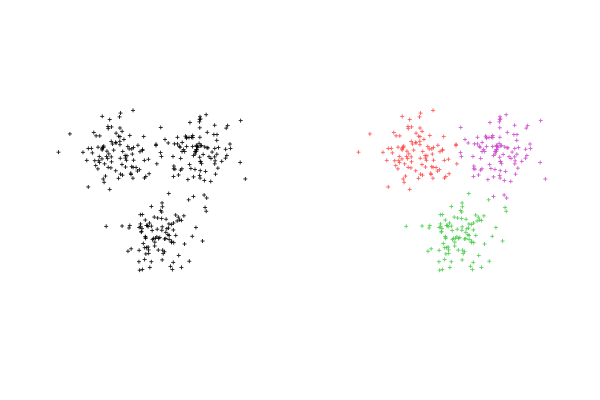

In [4]:
result = kmeans(X, 3, maxiter=3)
plot2 = plot(ratio=1,grid=:none,xlims=[0,6],ylims=[0,6],frame=:none,legend=:none)
scatter!(X[1,:], X[2,:], marker_z=result.assignments, markershape=:+, ms=2, color=:lightrainbow)
dists = pairwise(Euclidean(), X, X, dims=2)
m_sil = mean(silhouettes(result, dists))

println("mean silhouette ", round(m_sil, digits=3))
plot(plot1, plot2)

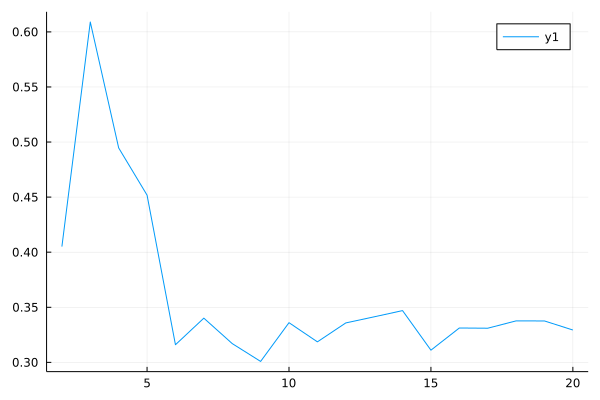

In [5]:
dists = pairwise(Euclidean(), X, X, dims=2)
m_sils = []
for k = 2:20
    result = kmeans(X, k, maxiter=10)
    m_sil = mean(silhouettes(result, dists))
    push!(m_sils, m_sil)
end
plot(2:20,m_sils)